# Phase 4 - Outliers detection and normalization
*TEAM 5*

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
from scipy.stats import zscore


In [2]:
movies = pd.read_csv('../data/us.movies.actors.tsv', sep='\t', na_values=['\\N'])
print(f'{movies.shape=}')

c:\users\ellis\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


movies.shape=(9465447, 23)


In [3]:
movies.head()

,tconst,nconst,primaryName,birthYear,deathYear,primaryProfession,titleType,primaryTitle,originalTitle,isAdult,...,genres,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes
0,tt0000574,nm0170118,Bella Cola,NaN,NaN,actress,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,...,Action,5,The Story of the Kelly Gang,US,NaN,imdbDisplay,NaN,0,6.1,692
1,tt0000574,nm0170118,Bella Cola,NaN,NaN,actress,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,...,Adventure,5,The Story of the Kelly Gang,US,NaN,imdbDisplay,NaN,0,6.1,692
2,tt0000574,nm0170118,Bella Cola,NaN,NaN,actress,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,...,Biography,5,The Story of the Kelly Gang,US,NaN,imdbDisplay,NaN,0,6.1,692
3,tt0000574,nm0187697,Sam Crewes,NaN,NaN,actor,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,...,Action,5,The Story of the Kelly Gang,US,NaN,imdbDisplay,NaN,0,6.1,692
4,tt0000574,nm0187697,Sam Crewes,NaN,NaN,actor,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,...,Adventure,5,The Story of the Kelly Gang,US,NaN,imdbDisplay,NaN,0,6.1,692


## Treating attribute missing and invalid values

Summary of the work done in the Python cells below:

- `tconst`: checking missing values and invalid format of the id, there isn't any of those. However, the attribute has almost only distinct values and should be deleted if during the data mining application.
- `nconst`: checking missing values and invalid format of the id, there isn't any of those. However, as for the previous attribute nconst has a lot of distinct values. It should be removed when data mining is applied.
- `primaryName`: checking missing values, there isn't any. As for the previous two, a lot a distinct values.
- `birthYear`: the missing value rate is above 73% which makes this attribute useless for the learning. 
- `deathYear`: as previously, the missing value rate is high (above 90%). It is understandable as all the actors aren't dead but it still makes this attribute hard to use and he may be irrelevant for the learning algorithm to keep this information.  
- `primaryProfession`: no missing or invalid values in this attribute.
- `titleType`: there aren't any invalid or missing entries for this attribute. There is a strong class imbalance which may lead to the suppression of this attribute but the information given may worth to keep it for now.
- `primaryTitle`: no invalid or missing values but lot of distinct values and 81% of similarity with originalTitle.
- `originalTitle`: no invalid or missing values but lot of distinct values and 81% of similarity with primaryTitle.
- `isAdult`: no invalid or missing entries but a strong class imbalance. However, the given information may be considered by the miner depending on his study.
- `startYear`: No invalid attributes as the range is coherent (1906-2021). 7 movies with missing startYear. They can be deleted regarding the size of the dataset if the purpose is to apply data mining methods. 
- `endYear`: all the values are missing for this attribute. It must be deleted as it doesn't bring any information.
- `runtimeMinutes`: there are some missing values and the value-range is too wide. As this variable may be very important for the analysis, it would be interesting to substitute its missing or invalid values. We identify outliers by computing the z-score. The entries with a too high z-score are omitted (z>10). Using z-score assumes normal distribution of the variable. We can validate this hypothesis afterward with the ditribution plot. These omitted values represent less than 2% of the entries which isn't a big ratio. We replace these values with the median as this replacement method is less sensitive to the distribution and the remaining extreme values.
- `genres`: there are 2094 movies with missing genres. It represents less than 0.2% of the dataset. There isn't any simple way of giving a genre so we would prefer to remove these values. All the other entries are valid.
- `ordering`: by looking at the distribution not any sample seems to be an outlier. There aren't any missing entries for this attribute.
- `title`: no invalid or missing values but lot of distinct values. This attribute has a lot of similarity with primaryTitle and originalTitle. 
- `region`: only one distinct value and there isn't any missing entries. This entry don't bring any information. 
- `language`: with more than 98% of missing entries, this attribute can't be used.
- `types`: there are around 16% or entries missing for this attribute. There is a strong class imbalance in this attribute so it may be possible to replace by the mode. As it adds bias to the dataset, it can be unappropriate to replace these values, we assume that the purpose of the further study won't be mainly focused on the types attribute. 
- `attributes`: with more than 88% percent of missing values, no information can be extracted for data mining purpose. 
- `averageRating`: values of the attribute are in the right range [0-10]. With no missing values.
- `numVotes`: the range of the attribute seems correct (only positive values and the one with the most votes are popular). No missing values.

### `tconst`

In [4]:
print(f'{movies.tconst.nunique()=}')
print(f'{movies.tconst.isna().sum()=}')

movies.tconst.nunique()=142461
movies.tconst.isna().sum()=0


In [5]:
is_tconst_format = lambda x: bool(re.match('tt[0-9]+', x))
movies.tconst.map(is_tconst_format).sum()

9465447

No missing and/or invalid values, lot of distinct values.

### `nconst`

In [6]:
print(f'{movies.nconst.nunique()=}')
print(f'{movies.nconst.isna().sum()=}')

movies.nconst.nunique()=1312824
movies.nconst.isna().sum()=0


In [7]:
is_nconst_format = lambda x: bool(re.match('nm[0-9]+', x))
movies.nconst.map(is_nconst_format).sum()

9465447

No missing and/or invalid values, lot of distinct values.

### `primaryName`

In [8]:
print(movies.primaryName.isna().sum())

0


In [9]:
print(f'{movies.primaryName.nunique()=}')

movies.primaryName.nunique()=1221954


No missing values, lot of distinct values.

### `Birth year`

In [10]:
movies.birthYear.isna().mean()

0.7305217598281413

The missing value rate is above 73% which may make this attribute useless for the learning. 

### `deathYear`

In [11]:
movies.deathYear.isna().mean()

0.9126614939579716

The missing value rate is above 90%. It is understandable as all the actors aren't dead but it still makes this attribute hard to use and he may be irrelevant for the learning algorithm to keep this information.

### `primaryProfession`

In [12]:
movies.primaryProfession.isna().sum()

0

In [13]:
movies.primaryProfession.unique()

array(['actress', 'actor', 'assistant_director', 'cinematographer',
       'producer', 'director', 'writer', 'production_designer', 'editor',
       'editorial_department', 'make_up_department', 'soundtrack',
       'location_management', 'miscellaneous', 'sound_department',
       'visual_effects', 'production_manager', 'animation_department',
       'stunts', 'art_department', 'camera_department',
       'costume_department', 'casting_director', 'script_department',
       'special_effects', 'composer', 'music_department', 'set_decorator',
       'costume_designer', 'art_director', 'talent_agent',
       'transportation_department', 'casting_department', 'executive',
       'manager', 'publicist', 'legal', 'assistant',
       'production_department'], dtype=object)

No missing or invalid value in this attribute.

### `titleType`

In [14]:
movies.titleType.isna().sum()

0

In [15]:
movies.titleType.value_counts()

movie      9225784
tvMovie     239663
Name: titleType, dtype: int64

There aren't any invalid or missing entries for this attribute. There is a strong class imbalance which may lead to the suppression of this attribute but the information given may worth to keep it for now.

### `primaryTitle` / `originalTitle`

In [16]:
print(f'{movies.primaryTitle.isna().sum()=}')
print(f'{movies.primaryTitle.nunique()=}')

movies.primaryTitle.isna().sum()=0
movies.primaryTitle.nunique()=125298


In [17]:
print(f'{movies.originalTitle.isna().sum()=}')
print(f'{movies.originalTitle.nunique()=}')

movies.originalTitle.isna().sum()=0
movies.originalTitle.nunique()=130378


Very similar attributes with no missing values and almost the same number of unique values. We compare the two element-wise with the main title variable.

### `title`

In [18]:
print(f'{movies.title.isna().sum()=}')
print(f'{movies.title.nunique()=}')

movies.title.isna().sum()=0
movies.title.nunique()=149274


In [19]:
movies.primaryTitle.eq(movies.title).sum()/movies.shape[0]

0.7088605535480786

In [20]:
movies.originalTitle.eq(movies.title).sum()/movies.shape[0]

0.5677131782577199

71% and 57% of similarity between the variables is a lot of correlation. These variables convey the same information. Only one should be kept. As title has more unique entries (with no missing values), we'll keep this one. Note: isOriginalTitle is linked with originalTitle. 

### `isAdult`

In [21]:
movies.isAdult.isna().sum()

0

In [22]:
movies.isAdult.value_counts()

0    9403387
1      62060
Name: isAdult, dtype: int64

No invalid or missing entries but a strong class imbalance. However, the given information may be considered by the miner depending on his study.

### `startYear`

In [23]:
movies.loc[movies.startYear.isna(), :][['title', 'startYear']].drop_duplicates()

,title,startYear
846789,The Money (1976),NaN
846790,Atlantic City Jackpot,NaN
7230529,As Words Breathe,NaN
7475515,Untitled Chris Black Project,NaN
7475516,Reckless,NaN
8987922,Cool as Hell 2,NaN
8997388,Gray Is the New Blonde,NaN
9005997,Day 13,NaN
9419545,Patriot Acts,NaN


In [24]:
movies.startYear.describe()

count    9.465308e+06
mean     2.001032e+03
std      1.943025e+01
min      1.906000e+03
25%      1.995000e+03
50%      2.008000e+03
75%      2.014000e+03
max      2.022000e+03
Name: startYear, dtype: float64

In [25]:
print(f'{movies.startYear.min()=}')
print(f'{movies.startYear.max()=}')

movies.startYear.min()=1906.0
movies.startYear.max()=2022.0


No invalid attributes as the range is correct. 7 movies have empty startYear values, this small amount can be deleted, for the movie The Money (1976) we can fill the value.

### `endYear`

In [26]:
movies.endYear.isna().sum()/movies.shape[0]

1.0

All the values are missing for this attribute. It must be deleted as it doesn't bring any information.

### `runtimeMinutes`

In [27]:
print(f'{movies.runtimeMinutes.isna().sum()=}')

print(f'{movies.runtimeMinutes.min()=}')
print(f'{movies.runtimeMinutes.max()=}')

movies.runtimeMinutes.isna().sum()=176915
movies.runtimeMinutes.min()=4.0
movies.runtimeMinutes.max()=5220.0


The are some missing values and the range is too wide. As this variable is very important it would be interesting to substitute its missing or invalid values.

In [28]:
scores = np.abs(zscore(movies.runtimeMinutes, nan_policy='omit'))

In [29]:
(scores<10).mean()

0.980999946436761

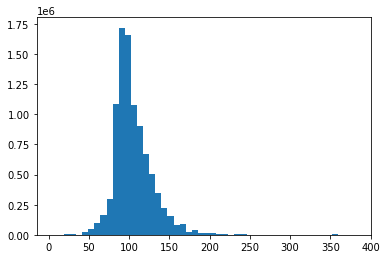

In [30]:
plt.hist(movies.runtimeMinutes[scores<10], bins=50)
plt.show()

We identify outliers by computing the z-score. The entries with a too high z-score are omitted (z>10). Using z-score assumes normal distribution of the variable. We can validate this hypothesis afterward with the ditribution plot. These omitted values represent less than 2% of the entries which isn't a big ratio. We replace these values with the median as this replacement method is less sensitive to the distribution and the remaining extreme values.

### `genres`

In [31]:
movies.genres.isna().sum()/movies.shape[0]

0.0017490985898500093

In [32]:
movies.loc[movies.genres.isna(), ['title', 'genres']].drop_duplicates()

,title,genres
128,Dorothy and the Scarecrow in Oz,NaN
162,The Infant at Snakeville,NaN
287,As You Like It,NaN
1312,A Venetian Night,NaN
1315,When the Earth Trembled,NaN
...,...,...
9435873,Music Hole,NaN
9442612,Zombie Universe 2,NaN
9445745,Little Wound's Warriors,NaN
9446502,Full Gas,NaN


In [33]:
movies.genres.value_counts().head(10)

Drama        1988643
Comedy       1335463
Action       1138079
Adventure     729695
Thriller      621392
Crime         579403
Romance       552054
Horror        517704
Sci-Fi        394383
Fantasy       272950
Name: genres, dtype: int64

There are 2094 movies with missing genres. It represents less than 0.2% of the dataset. There isn't any simple way of giving a genre so we would prefer to remove these values. All the other entries are valid.

### `ordering`

In [34]:
movies.ordering.isna().sum()

0

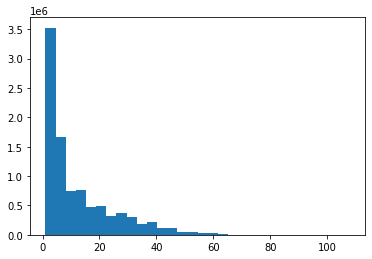

In [35]:
plt.hist(movies.ordering, bins = 30)
plt.show()

By looking at the distribution not any sample seems to be an outlier. There aren't any missing entries for this attribute.

### `region`

In [36]:
movies.region.value_counts()

US    9465447
Name: region, dtype: int64

Only one distinct value and there isn't any missing entries. This entry don't give any information. 

### `language`

In [37]:
movies.language.isna().sum()/movies.shape[0]

0.9822024253054293

In [38]:
movies.language.value_counts()

en     144145
es      22618
yi       1306
haw       285
hi        108
Name: language, dtype: int64

With more than 98% of missing entries, this attribute can't be used.

### `types`

In [39]:
movies.types.isna().sum()/movies.shape[0]

0.15879693795760516

In [40]:
movies.types.value_counts()

imdbDisplay         6321755
working             1194502
alternative          258993
dvd                   69983
video                 64631
festival              28349
tv                    22728
original                447
videoworking           330
tvworking              256
tvvideo                167
festivalworking        147
dvdvideo                75
Name: types, dtype: int64

There are around 16% or entries missing for this attribute. There is a strong class imbalance in this attribute so it may be possible to replace by the mode imbdDisplay. As it adds bias to the dataset, it can be unappropriate to replace these values, we assume that the purpose of the further study won't be mainly focused on the types attribute. 

### `attributes`

In [41]:
movies.attributes.isna().sum()/movies.shape[0]

0.8832563322154781

With more than 88% percent of missing values this attribute can't be used for data mining. 

### `averageRating`

movies.averageRating.isna().sum()=0
movies.averageRating.min()=1.0
movies.averageRating.max()=10.0


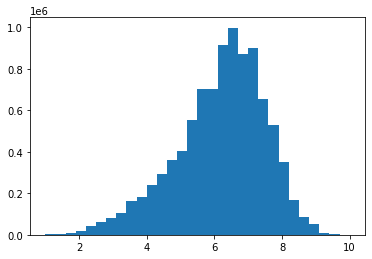

In [42]:
print(f'{movies.averageRating.isna().sum()=}')

print(f'{movies.averageRating.min()=}')
print(f'{movies.averageRating.max()=}')

plt.hist(movies.averageRating, bins=30)
plt.show()

Values of the attribute are in the right range [0-10]. With no missing values.

### `numVotes`

movies.numVotes.isna().sum()=0
movies.numVotes.min()=5
movies.numVotes.max()=2455388


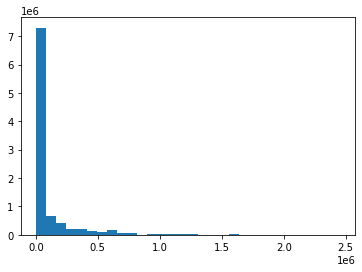

In [43]:
print(f'{movies.numVotes.isna().sum()=}')

print(f'{movies.numVotes.min()=}')
print(f'{movies.numVotes.max()=}')

plt.hist(movies.numVotes, bins=30)
plt.show()

In [44]:
movies.sort_values('numVotes', ascending=False)[['numVotes', 'title']].drop_duplicates().head(10)

,numVotes,title
2054373,2455388,The Shawshank Redemption
2054243,2455388,Rita Hayworth and Shawshank Redemption
4498835,2411126,The Dark Knight: The IMAX Experience
4498844,2411126,The Dark Knight
4498842,2411126,Batman Begins 2
4498821,2411126,Rory's First Kiss
4498840,2411126,Winter Green
4498839,2411126,Untitled Batman Begins Sequel
4498838,2411126,Batman: The Dark Knight
5905365,2163044,Inception: The IMAX Experience


The range of the attribute seems correct (only positive values and the one with the most votes are popular). No missing values.

# Replacement and column removal

In [45]:
out = movies.copy().drop(
        ['birthYear', 'deathYear', 'primaryTitle', 'originalTitle', 'isOriginalTitle', 'endYear', 'region', 'language', 'attributes'],
        axis=1
    )

In [46]:
out.loc[out.title == "The Money (1976)", 'startYear'] = 1976
out.loc[out.title == "Samhain", 'startYear'] = 2020
out.loc[out.title == "As Words Breath", 'startYear'] = 2018
out.loc[out.title == "Reckless", 'startYear'] = 1984
out.loc[out.title == "Cool as Hell 2", 'startYear'] = 2019
out.loc[out.title == "Patriot Acts", 'startYear'] = 2004
out.loc[out.title == "Atlantic City Jackpot", 'startYear'] = 1976

out.loc[out.types.isna(), 'types'] = 'imbdDisplay'

out = out.dropna(axis=0, subset= ['startYear'])

out.loc[ np.abs(zscore(out.runtimeMinutes, nan_policy='omit')) >10, 'runtimeMinutes'] = np.nan
out.loc[out.runtimeMinutes.isna(), 'runtimeMinutes'] = np.nanquantile(out.runtimeMinutes.values, .5)

In [47]:
out.reset_index(drop=True, inplace=True)

In [48]:
out.head(5)

,tconst,nconst,primaryName,primaryProfession,titleType,isAdult,startYear,runtimeMinutes,genres,ordering,title,types,averageRating,numVotes
0,tt0000574,nm0170118,Bella Cola,actress,movie,0,1906.0,70.0,Action,5,The Story of the Kelly Gang,imdbDisplay,6.1,692
1,tt0000574,nm0170118,Bella Cola,actress,movie,0,1906.0,70.0,Adventure,5,The Story of the Kelly Gang,imdbDisplay,6.1,692
2,tt0000574,nm0170118,Bella Cola,actress,movie,0,1906.0,70.0,Biography,5,The Story of the Kelly Gang,imdbDisplay,6.1,692
3,tt0000574,nm0187697,Sam Crewes,actor,movie,0,1906.0,70.0,Action,5,The Story of the Kelly Gang,imdbDisplay,6.1,692
4,tt0000574,nm0187697,Sam Crewes,actor,movie,0,1906.0,70.0,Adventure,5,The Story of the Kelly Gang,imdbDisplay,6.1,692


# Normalization